In [1]:
import os
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import torch
import torchvision
from torchvision import transforms
import tensorflow as tf
import albumentations as A
import imgaug.augmenters as iaa
from imgaug import parameters as iap

In [2]:
Cassava = False
FGVC8_HERB = False # herbarium 2021
FGVC8_CAM = False # iwildcam2021
FGVC8_PLANT = True # plant pathology 2021

if Cassava:
    DIR = "../input/cassava-leaf-disease-classification/train_images"
    image_path = f'{DIR}/100042118.jpg'
if FGVC8_PLANT:
    DIR = "/home/madhu/Downloads/plant-pathology-2021-fgvc8/train_images"
    image_path = f'{DIR}/800113bb65efe69e.jpg'
if FGVC8_HERB:
    DIR = "../input/herbarium-2021-fgvc8/train/images/000/00"
    image_path = f'{DIR}/1360648.jpg'
if FGVC8_CAM:
    DIR = "../input/iwildcam2021-fgvc8/train"
    image_path = f'{DIR}/86760c00-21bc-11ea-a13a-137349068a90.jpg'


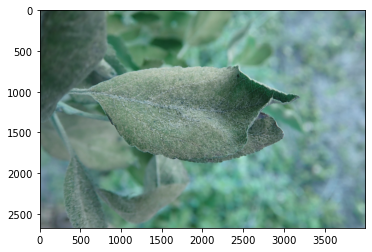

In [3]:
chosen_image = cv2.imread(image_path)
plt.imshow(chosen_image)

In [4]:
def insect_augmentation(image, n_insects=2, dark_insects=False, p=0.5, insects_folder="/home/madhu/Downloads/bee_augmented"):
    aug_prob = random.random()
    if aug_prob < p:
        height, width, _ = image.shape
        insect_images = [im for im in os.listdir(insects_folder) if "bee" in im]
        print("image shape", image.shape)
    
    for _ in range(n_insects):
        insect = cv2.cvtColor(cv2.imread(os.path.join(insects_folder, random.choice(insect_images))), cv2.COLOR_BGR2RGB)
        print("original insect shape", insect.shape)
        insect = cv2.flip(insect, random.choice([-1, 0, 1]))
        insect = cv2.rotate(insect, random.choice([0, 1, 2]))
        insect = cv2.resize(insect, (width, height))
        print("insect shape resized", insect.shape)

        h_height, h_width, _ = insect.shape
        roi_ho = random.randint(0, (image.shape[0] - insect.shape[0]))
        roi_wo = random.randint(0, (image.shape[1] - insect.shape[1]))
        roi = image[roi_ho:roi_ho+h_height, roi_wo:roi_wo+h_width]

        # Creating a mask and inverse mask 
        img2gray = cv2.cvtColor(insect, cv2.COLOR_RGB2GRAY)
        ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        #mask_inv = cv2.cvtColor(cv2.bitwise_not(mask),cv2.COLOR_BGR2GRAY)
        mask_inv = cv2.bitwise_not(mask)

        # Now black-out the area of insect in ROI
        img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


image shape (2672, 4000, 3)
original insect shape (635, 964, 3)
insect shape resized (2672, 4000, 3)
original insect shape (635, 964, 3)
insect shape resized (2672, 4000, 3)


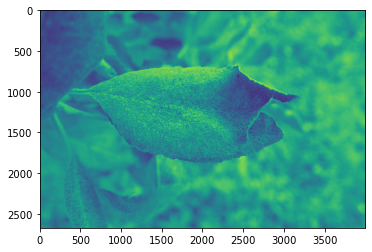

In [24]:
chosen_image = cv2.imread(image_path)
aug_image = insect_augmentation(chosen_image, n_insects=2, dark_insects=False, p=1.0)
plt.imshow(aug_image)


In [ ]:
imgnew = cv2.imread("/home/madhu/timage.jpg")
plt.subplot(1, 2, 1)
plt.imshow(imgnew)
greyimg = cv2.cvtColor(imgnew, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)